In [4]:
%load_ext autoreload
%autoreload 2

from bethe_block import *
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
rho = 2.69
ke = np.linspace(.1, 100, 100)
pstar_data = np.genfromtxt('pstar_27Al.dat', skip_header=8)
wiki_data = np.array([[.3, 100],[70, 2]])
bse = bethe_bloch(ke, Z=13, A=27, rho=rho, I=166e-6) / 10  # in MeV/mm
sp = stopping_power(ke, Z=13, A=27, rho=rho, I=166e-6)

Text(0.5, 0.98, 'Aluminium stopping power for protons')

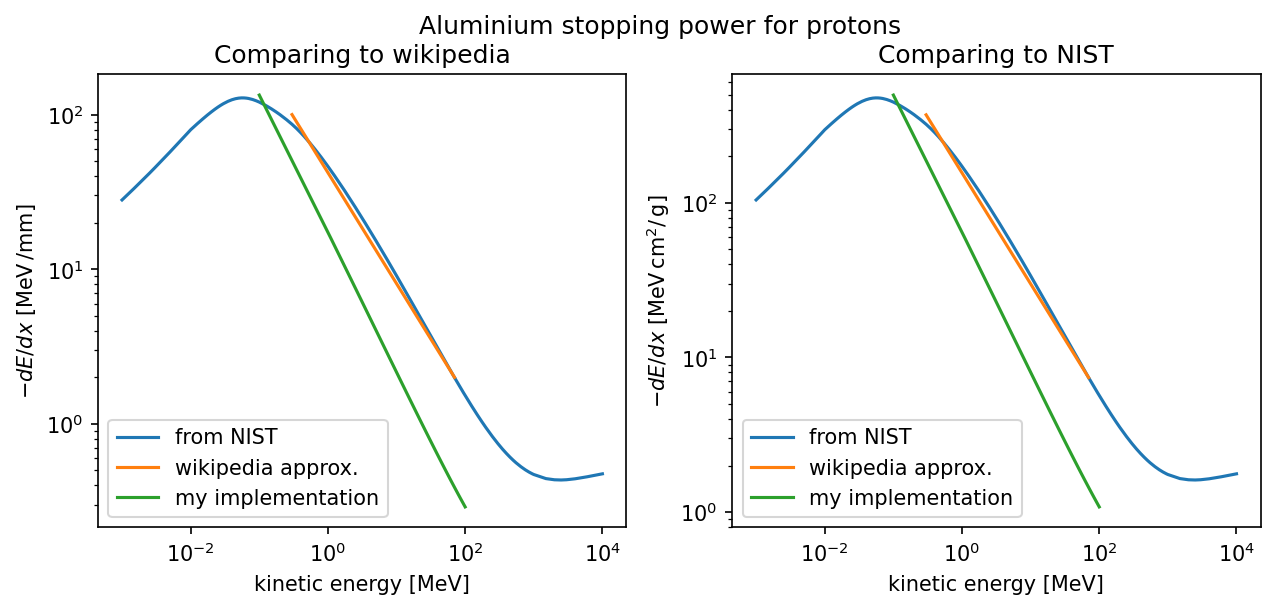

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
# for beryllium


plt.sca(ax1)

plt.plot(pstar_data[:, 0], pstar_data[:, 3] * rho / 10, label='from NIST')
plt.plot(wiki_data[:, 0], wiki_data[:, 1], label='wikipedia approx.')
plt.plot(ke, bse, label='my implementation')

plt.loglog()
plt.xlabel('kinetic energy [MeV]')
plt.ylabel(r'$-dE/dx$ $\rm [MeV\,/mm]$')
plt.title('Comparing to wikipedia')
plt.legend()

plt.sca(ax2)

plt.plot(pstar_data[:, 0], pstar_data[:, 3], label='from NIST')
plt.plot(wiki_data[:, 0], wiki_data[:, 1]*10/2.7, label='wikipedia approx.')
plt.plot(ke, sp, label='my implementation')

plt.loglog()
plt.xlabel('kinetic energy [MeV]')
plt.ylabel(r'$-dE/dx$ $\rm [MeV\,cm^2/\,g ]$')
plt.title('Comparing to NIST')
plt.legend()

f.suptitle('Aluminium stopping power for protons')

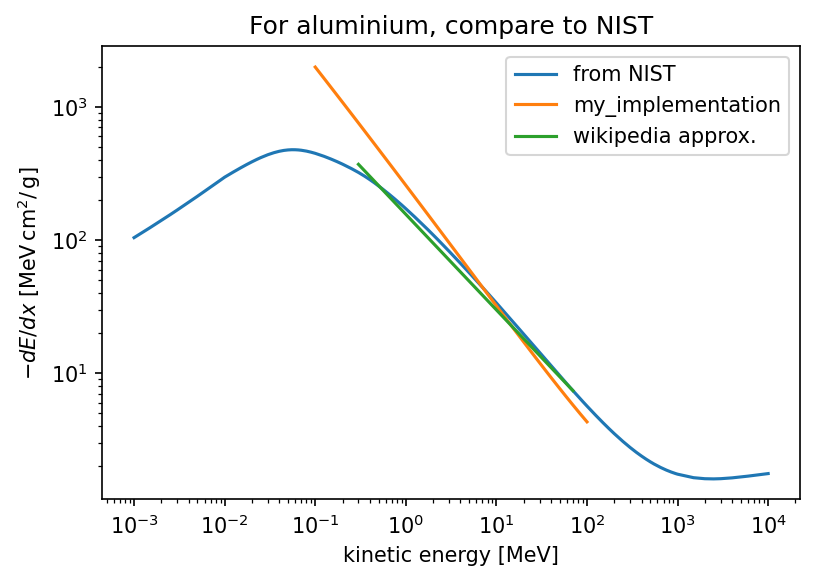

In [8]:
plt.subplots(dpi=150)

ke = np.logspace(-1, 2, 40)

plt.plot(pstar_data[:, 0], pstar_data[:, 3], label='from NIST')

sp = stopping_power(ke, Z=13, A=27, rho=2.69, I=166e-6)
plt.plot(ke, sp*4, label='my_implementation')

plt.plot(wiki_data[:, 0], wiki_data[:, 1]*10/2.7, label='wikipedia approx.')

plt.loglog()
plt.xlabel('kinetic energy [MeV]')
plt.ylabel(r'$-dE/dx$ $\rm [MeV\,cm^2/\,g ]$')
plt.title('For aluminium, compare to NIST')
plt.legend()

In [37]:
def prange(Eo, **kwargs):
    """calculates the range of a proton of energy Eo
    in a  material. Uses the bethe-bloch formula
    
    Eo in MeV
    """
    logEcut = np.max([np.log10(Eo) - 3, -3])
    E = np.logspace(logEcut, np.log10(Eo), 10*int(np.log10(Eo) - logEcut))
    
    SP = bethe_bloch(E, **kwargs)
    
    return E[1:], cumtrapz(1./SP, E)

Text(0.5, 1.0, 'Proton ranges for Aluminum')

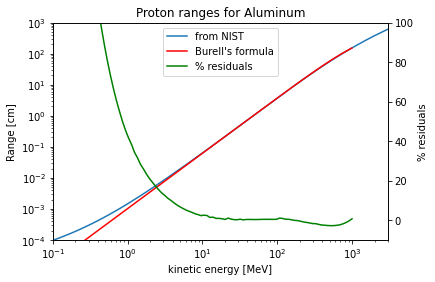

In [73]:
plt.plot(pstar_data[:, 0], pstar_data[:, 4] / rho, label='from NIST')

# plt.loglog(*prange(1000), label='my implementation')

egrid, bprange = burells_formula(np.logspace(-1, 3, 100), 'aluminum')
plt.loglog(egrid, bprange/rho, 'r', label='Burell\'s formula')


nprange = np.interp(egrid, pstar_data[:, 0], pstar_data[:, 4])

ax1 = plt.gca()
ax2 = plt.twinx()

ax2.plot(egrid, (nprange - bprange)/bprange*100, 'g', label='% residuals')
# x = np.logspace(-5, 2, 40)
# plt.scatter(x, x**1.8)

plt.ylabel('% residuals')
plt.ylim(-10, 100)

plt.sca(ax1)
plt.plot([], [], 'g', label='% residuals')
plt.xlabel('kinetic energy [MeV]')
plt.ylabel('Range [cm]')

plt.axis([1e-1, 3e3, 1e-4, 1e3])
plt.legend(loc='upper center')

plt.title('Proton ranges for Aluminum')

(1.0, 10.0, 0.0, 0.6)

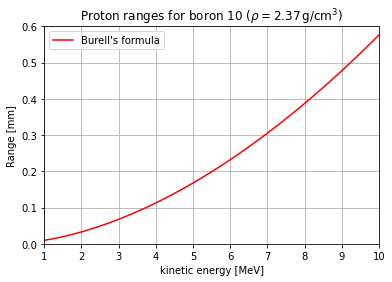

In [82]:

# plt.plot(pstar_data[:, 0], pstar_data[:, 4] / rho, label='from NIST')

egrid, bprange = burells_formula(np.linspace(.1, 10, 100), (5, 10))
plt.plot(egrid, 10*bprange/2.37, 'r', label='Burell\'s formula')

plt.xlabel('kinetic energy [MeV]')
plt.ylabel('Range [mm]')

plt.grid()
plt.legend()
plt.title(r'Proton ranges for boron 10 ($\rho=2.37 \, {\rm g/cm^3}$)')

plt.axis([1, 10, 0, .6])